In [1]:
#Defined class named Graph
class Graph:
  def __init__(self):
    self.nodes = {}
    self.edges = {}

  def add_node(self, name, data=None):
    if name in self.nodes and self.get_node_data(name)!='u':
        print(f"Node with name '{name}' already exists. Skipping..")
    else:
      self.nodes[name] = {'data': data}

  def add_edge(self, source, destination):
    if source not in self.nodes or destination not in self.nodes:
      raise ValueError("Source or destination node does not exist.")
    self.edges[(source, destination)] = None

  def get_node_data(self, name):
    if name not in self.nodes:
      return None
    return self.nodes[name]['data']

  def get_neighbors(self, node):
    neighbors = []
    for edge in self.edges:
      if edge[0] == node:
        neighbors.append(edge[1])
    return neighbors

  def delete_node(self, name):
    if name not in self.nodes:
      raise ValueError(f"Node '{name}' does not exist in the graph.")

    del self.nodes[name]

    edges_to_delete = []
    for edge in self.edges:
      if edge[0] == name or edge[1] == name:
        edges_to_delete.append(edge)
    for edge in edges_to_delete:
      del self.edges[edge]


  def __str__(self):
    output = "Nodes:\n"
    for name, data in self.nodes.items():
      output += f"- {name}: {data['data']}\n"
    output += "Edges:\n"
    for edge in self.edges:
      output += f"- {edge[0]} -> {edge[1]}\n"
    return output

In [2]:
#Importing important modules and libraries
import re                                     #re is used for Python Regular Expression and Pattern Matching
import matplotlib.pyplot as plt               #matplotlib.pyplot is used for visualizations and plots
import networkx as nx                         #networkx is used for creating nd manipulating networks and graphs
import numpy as np

In [3]:
inputs=[]
outputs=[]
graph=Graph()
#Patterns set according to aspects of benchfile lines
p1 = r"([A-Z0-9]+)"
p2 = r"\ .*\("
p3 = r"\(.*\)"
filename=""                                               #variable to hold file name during selecting bench file
Type=''                                                   #variable to hold gate type of edge later on

print("1. s27.bench")
print("2. s208.bench")
print("3. test1.bench.txt")
op=int(input("Enter which bench file to evaulate:"))      #Bench files are uploaded into Colab Notebook Memory before runtime
if op==1:
  filename="s27.bench"
elif op==2:
  filename="s208.bench"
elif op==3:
  filename="test1.bench.txt"
with open(filename, "r") as f:
    lines = f.readlines()                                 #lines holds each line of code from bench file including comments

for line in lines:
    if line.startswith('#') or line.startswith('\n'):     #Check for comments and newlines in benchfile and skips them
        continue
    m1 = re.search(p1, line)                              #m1 stores the 'LHS' of equation line
    m2 = re.search(p2, line)                              #m2 stores the 'operands' with brackets
    m3 = re.search(p3, line)                              #m3 stores the 'operation' taking place with succeding bracket character
    wl=0                                                  #wl stands for word left, 0-> node, 1-> input, 2-> output
    if m1:
      key=m1.group(0)                                     #key stores whether line is input, output or other line of code in benchfile
      if (key=='INPUT'):
        wl=1
      elif (key=='OUTPUT'):
        wl=2
    if m2:
      g=m2.group(0)
      Type=g[3:-1]                                        #Type stores the gate type of key node if key is not input or output
      if wl==0:
        graph.add_node(key,Type)
    if m3:
      ent=m3.group(0)[1:-1]                               #ent stores the values to be fed into key
      #if not node
      if wl==2:                                           #if key is input then ent is node stored as input type
        outputs.append(ent)
      if wl==1:                                           #if key is input then ent is node stored as input type
        inputs.append(ent)
        graph.add_node(ent,'inp')
      #if node
      else:
        if ',' in ent:                                    #if ent is two values, the we split them and store both nodes
          se=ent.split(', ')
          for i in se:
            graph.add_node(i,'u')
            graph.add_edge(key,i)
        else:                                             #if ent is single value, we directly store as node
          if wl!=2:
            graph.add_node(ent,'u')
            graph.add_edge(key,ent)

if ((((len(list(graph.nodes)))-len(inputs))%2)!=0):                     #if odd number of nodes, then we add a dummy node for future operation
  graph.add_node('D','D')
for i in inputs:
  graph.delete_node(i)
print(graph)
print('Inputs:',inputs)
print('Outputs:',outputs)

1. s27.bench
2. s208.bench
3. test1.bench.txt
Enter which bench file to evaulate:1
Node with name 'G0' already exists. Skipping..
Node with name 'G14' already exists. Skipping..
Node with name 'G6' already exists. Skipping..
Node with name 'G8' already exists. Skipping..
Node with name 'G3' already exists. Skipping..
Node with name 'G8' already exists. Skipping..
Node with name 'G16' already exists. Skipping..
Node with name 'G15' already exists. Skipping..
Node with name 'G14' already exists. Skipping..
Node with name 'G5' already exists. Skipping..
Node with name 'G9' already exists. Skipping..
Node with name 'G1' already exists. Skipping..
Node with name 'G7' already exists. Skipping..
Node with name 'G2' already exists. Skipping..
Node with name 'G12' already exists. Skipping..
Nodes:
- G5: DFF
- G10: NOR
- G6: DFF
- G11: NOR
- G7: DFF
- G13: NOR
- G14: NOT
- G17: NOT
- G8: AND
- G15: OR
- G12: NOR
- G16: OR
- G9: NAND
- D: D
Edges:
- G5 -> G10
- G6 -> G11
- G7 -> G13
- G17 -> G11


In [4]:
#This is section is for beautifying graph and adding color, size and weight for each node type
colors={}
sizes={}
for x,y in graph.nodes.items():
  if y['data']=='NOT':
    colors[x]='lightblue'
    sizes[x]=100
  elif y['data']=='NAND':
    colors[x]='yellow'
    sizes[x]=200
  elif y['data']=='NOR':
    colors[x]='orange'
    sizes[x]=200
  elif y['data']=='AND':
    colors[x]='pink'
    sizes[x]=150
  elif y['data']=='OR':
    colors[x]='plum'
    sizes[x]=150
  elif y['data']=='XOR':
    colors[x]='indigo'
    sizes[x]=300
  elif y['data']=='DFF':
    colors[x]='grey'
    sizes[x]=500
  else:                                             #for dummy node
    colors[x]='bisque'
    sizes[x]=100
edges_with_weights=[]
edge_weights={}
for a,b in list(graph.edges.keys()):
  weight=int((sizes[a])/100)
  edges_with_weights.append((a,b,weight))
  edge_weights[(a,b)]=weight                        #weights for each edge proportional to size of start node to visualize delay by node
print(edges_with_weights)

[('G5', 'G10', 5), ('G6', 'G11', 5), ('G7', 'G13', 5), ('G17', 'G11', 1), ('G8', 'G14', 1), ('G8', 'G6', 1), ('G15', 'G12', 1), ('G15', 'G8', 1), ('G16', 'G8', 1), ('G9', 'G16', 2), ('G9', 'G15', 2), ('G10', 'G14', 2), ('G10', 'G11', 2), ('G11', 'G5', 2), ('G11', 'G9', 2), ('G12', 'G7', 2), ('G13', 'G12', 2)]


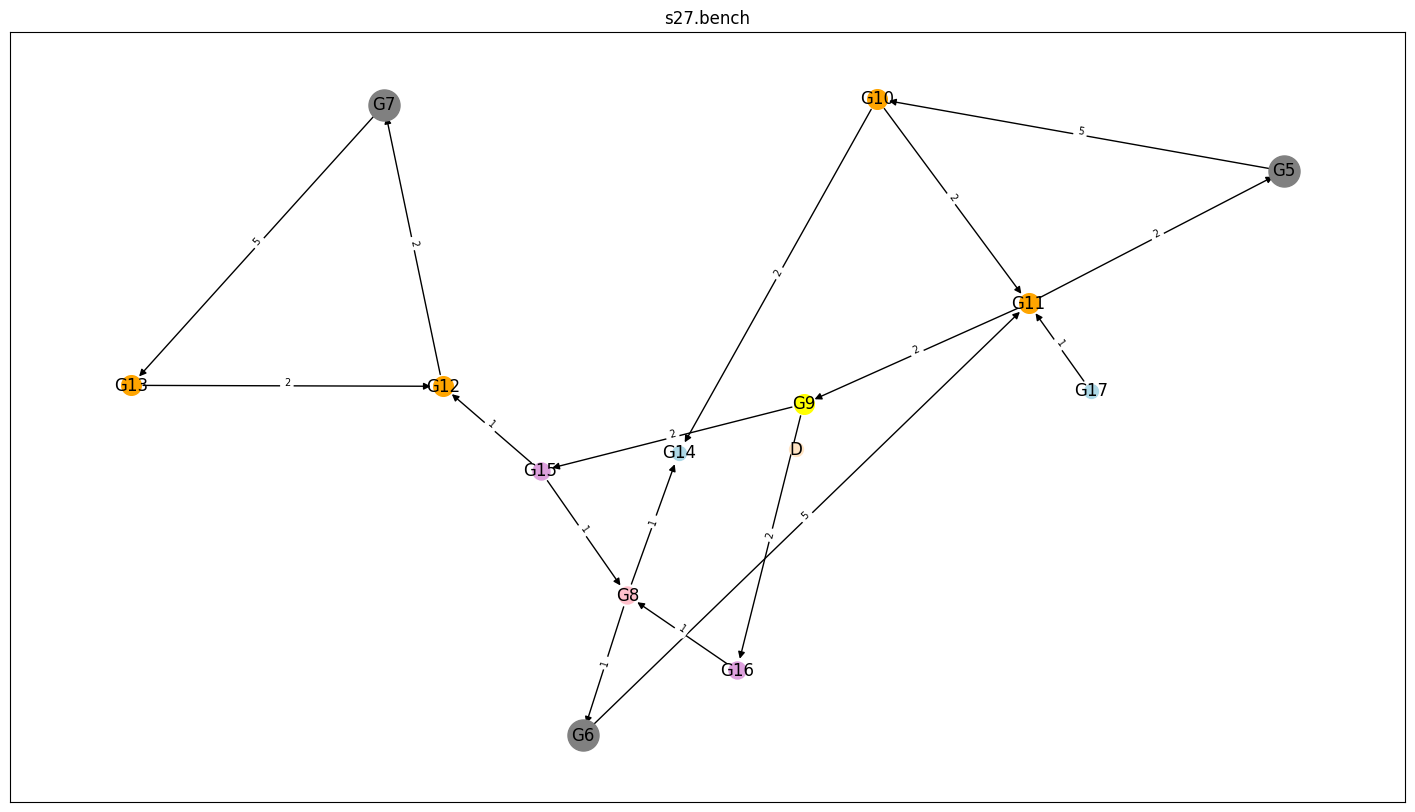

In [5]:
G = nx.DiGraph()                                                                                   #Creating a directed graph
G.add_nodes_from(list(graph.nodes))
G.add_weighted_edges_from(edges_with_weights)
plt.figure(figsize =(18, 10))
pos = nx.kamada_kawai_layout(G)                                                                     #layout to help visulaize with less clutter
node_colors = list(colors.values())
node_sizes = list(sizes.values())
for node in G.nodes:
  nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=sizes[node], node_color=colors[node])   #Incorporating nodes
  nx.draw_networkx_labels(G, pos, labels={node:node})
nx.draw_networkx_edges(G, pos, arrows=True)                                                         #Drawing edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, verticalalignment='baseline', font_size=7)
plt.title(filename)
plt.show()

In [6]:
#For Adjacency Matrix
print('The nodes are',G.nodes())
nodes=list(G.nodes())
num_nodes = G.number_of_nodes()
ind={}                                                            #The ind dictionary is for storing indices to help with translation
i=0
for node in G.nodes:
  ind[node]=i
  i+=1
print('Indices:',ind)
adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
# Loop through edges and update the matrix
for eg in edges_with_weights:
  source, target, weight = eg
  adjacency_matrix[ind[source], ind[target]] = weight
print("Adjacency Matrix:")
print(adjacency_matrix)

The nodes are ['G5', 'G10', 'G6', 'G11', 'G7', 'G13', 'G14', 'G17', 'G8', 'G15', 'G12', 'G16', 'G9', 'D']
Indices: {'G5': 0, 'G10': 1, 'G6': 2, 'G11': 3, 'G7': 4, 'G13': 5, 'G14': 6, 'G17': 7, 'G8': 8, 'G15': 9, 'G12': 10, 'G16': 11, 'G9': 12, 'D': 13}
Adjacency Matrix:
[[0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [7]:
#Finding start element
print('The outputs are:')
for o in range(len(outputs)):
  print(o+1,'-',outputs[o])
sp=int(input('Enter which output to refer:'))
if (sp-1)<len(outputs):
  fp=ind[outputs[sp-1]]
else:
  fp=ind[outputs[-1]]
print('fp=',fp)

The outputs are:
1 - G17
Enter which output to refer:1
fp= 7


In [8]:
#Shortest Path Algorithm
from heapq import heappop, heappush
INF = 10000                                                     #Assigned an infinity for the sake of algorithm
def Djikstra(mat, start):                                       #Djikstra Algorithm Func with priority queue
  for i in range(len(mat)):                                     #Replacing 0s with INF to symbolise no edge in algorithm
    for j in range(len(mat)):
      if mat[i][j]==0:
        mat[i][j]=INF
  dist=[INF]*len(mat)
  dist[start]=0
  predecessor = {num: None for num in range(len(mat))}
  pri_q=[(0,start),]
  i=0
  while pri_q:
    current_distance, current_vertex = heappop(pri_q)
    if current_distance > dist[current_vertex]:
      continue
    for neighbour in range(len(mat[current_vertex])):
      if mat[current_vertex][neighbour] != INF:
        t=current_distance + mat[current_vertex][neighbour]
        if t < dist[neighbour]:
          dist[neighbour] = t
          predecessor[neighbour] = current_vertex
          heappush(pri_q,(t,neighbour))
  for i in range(len(mat)):
    for j in range(len(mat)):
      if mat[i][j]==INF:
        mat[i][j]=0
  return dist, predecessor
def Path(start,end):                                            #Path function to help reconstruct the shortest path for each node
  current=start
  while True:
    if current==end:
      print(nodes[end])
      break
    print(nodes[current],'-> ',end='')
    current=pred[current]
start=fp                                                        #start value corresponding to G17 with regards to s27.bench, will change
sd,pred=Djikstra(adjacency_matrix,start)
print('The array for shortest distances: ',sd)
for i in range(len(sd)):                                        #Iterate through the sd array and Path function
  if sd[i]==INF:
    print('Vertex',nodes[i],'cannot be reached')
  else:
    print('Vertex',nodes[i],'has dist of ',sd[i],'==> ',end='')
    Path(i,start)

The array for shortest distances:  [3, 8, 7, 1, 8, 13, 7, 0, 6, 5, 6, 5, 3, 10000]
Vertex G5 has dist of  3 ==> G5 -> G11 -> G17
Vertex G10 has dist of  8 ==> G10 -> G5 -> G11 -> G17
Vertex G6 has dist of  7 ==> G6 -> G8 -> G15 -> G9 -> G11 -> G17
Vertex G11 has dist of  1 ==> G11 -> G17
Vertex G7 has dist of  8 ==> G7 -> G12 -> G15 -> G9 -> G11 -> G17
Vertex G13 has dist of  13 ==> G13 -> G7 -> G12 -> G15 -> G9 -> G11 -> G17
Vertex G14 has dist of  7 ==> G14 -> G8 -> G15 -> G9 -> G11 -> G17
Vertex G17 has dist of  0 ==> G17
Vertex G8 has dist of  6 ==> G8 -> G15 -> G9 -> G11 -> G17
Vertex G15 has dist of  5 ==> G15 -> G9 -> G11 -> G17
Vertex G12 has dist of  6 ==> G12 -> G15 -> G9 -> G11 -> G17
Vertex G16 has dist of  5 ==> G16 -> G9 -> G11 -> G17
Vertex G9 has dist of  3 ==> G9 -> G11 -> G17
Vertex D cannot be reached


KL Algorithm

Edges with weights: [('G5', 'G10', 5), ('G6', 'G11', 5), ('G7', 'G13', 5), ('G17', 'G11', 1), ('G8', 'G14', 1), ('G8', 'G6', 1), ('G15', 'G12', 1), ('G15', 'G8', 1), ('G16', 'G8', 1), ('G9', 'G16', 2), ('G9', 'G15', 2), ('G10', 'G14', 2), ('G10', 'G11', 2), ('G11', 'G5', 2), ('G11', 'G9', 2), ('G12', 'G7', 2), ('G13', 'G12', 2)]
Par1: ['G10', 'G9', 'G12', 'G16', 'G13', 'G11', 'G8']
Par2: ['G7', 'G15', 'G5', 'G6', 'G17', 'G14', 'D']
Iteration 0
Curently partitions are:
Par1: ['G10', 'G9', 'G12', 'G16', 'G13', 'G11', 'G8']
Par2: ['G7', 'G15', 'G5', 'G6', 'G17', 'G14', 'D']
u1: ['G10', 'G9', 'G12', 'G16', 'G13', 'G11', 'G8']
u2: ['G7', 'G15', 'G5', 'G6', 'G17', 'G14', 'D']
I_List {'G10': 2, 'G9': 2, 'G12': 0, 'G16': 1, 'G13': 2, 'G11': 2, 'G8': 0, 'G7': 0, 'G15': 0, 'G5': 0, 'G6': 0, 'G17': 0, 'G14': 0, 'D': 0}
E_List {'G10': 2, 'G9': 2, 'G12': 2, 'G16': 0, 'G13': 0, 'G11': 2, 'G8': 2, 'G7': 5, 'G15': 2, 'G5': 5, 'G6': 5, 'G17': 1, 'G14': 0, 'D': 0}
D_List {'G10': 0, 'G9': 0, 'G12': 2, 'G

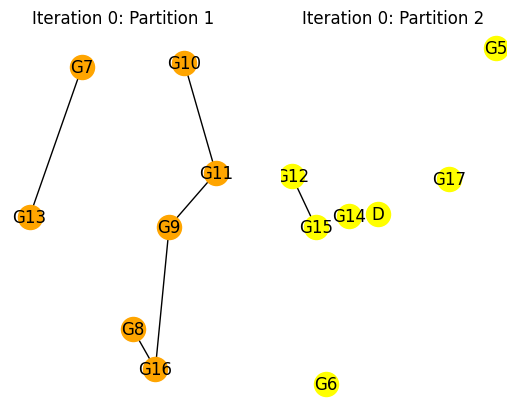

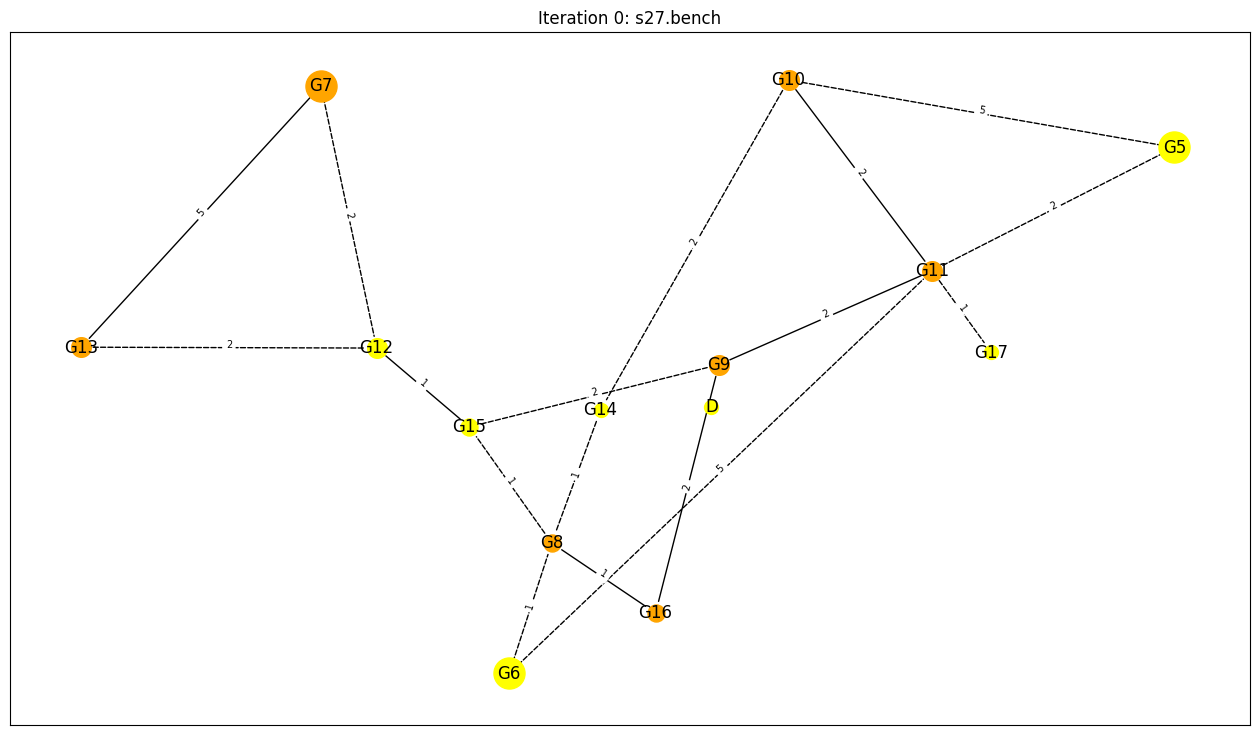

Iteration 1
Curently partitions are:
Par1: ['G10', 'G9', 'G16', 'G13', 'G11', 'G8', 'G7']
Par2: ['G15', 'G5', 'G6', 'G17', 'G14', 'D', 'G12']
u1: ['G10', 'G9', 'G16', 'G13', 'G11', 'G8']
u2: ['G15', 'G5', 'G6', 'G17', 'G14', 'D']
I_List {'G10': 2, 'G9': 2, 'G16': 1, 'G13': 0, 'G11': 2, 'G8': 0, 'G7': 5, 'G15': 1, 'G5': 0, 'G6': 0, 'G17': 0, 'G14': 0, 'D': 0, 'G12': 0}
E_List {'G10': 2, 'G9': 2, 'G16': 0, 'G13': 2, 'G11': 2, 'G8': 2, 'G7': 0, 'G15': 1, 'G5': 5, 'G6': 5, 'G17': 1, 'G14': 0, 'D': 0, 'G12': 2}
D_List {'G10': 0, 'G9': 0, 'G16': -1, 'G13': 2, 'G11': 0, 'G8': 2, 'G7': -5, 'G15': 0, 'G5': 5, 'G6': 5, 'G17': 1, 'G14': 0, 'D': 0, 'G12': 2}
G value for (G10, G15) is: 0
G value for (G15, G10) is: 0
G value for (G10, G5) is: 5
G value for (G5, G10) is: -5
G value for (G10, G6) is: 5
G value for (G6, G10) is: 5
G value for (G10, G17) is: 1
G value for (G17, G10) is: 1
G value for (G10, G14) is: -4
G value for (G14, G10) is: 0
G value for (G10, D) is: 0
G value for (D, G10) is: 0
G v

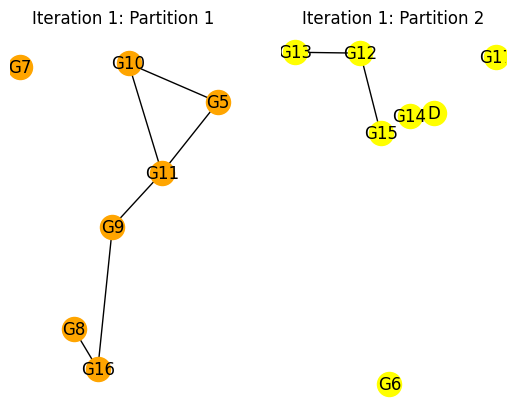

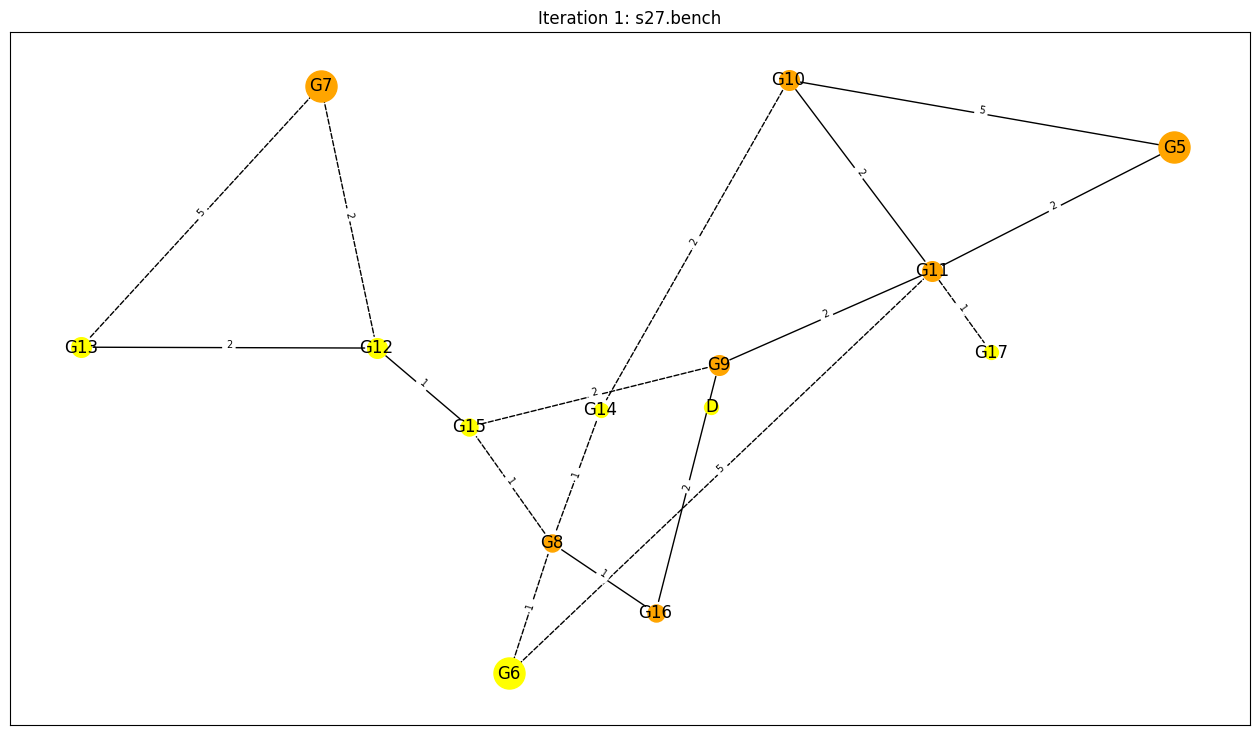

Iteration 2
Curently partitions are:
Par1: ['G10', 'G9', 'G16', 'G11', 'G8', 'G7', 'G5']
Par2: ['G15', 'G6', 'G17', 'G14', 'D', 'G12', 'G13']
u1: ['G10', 'G9', 'G16', 'G11', 'G8']
u2: ['G15', 'G6', 'G17', 'G14', 'D']
I_List {'G10': 2, 'G9': 2, 'G16': 1, 'G11': 4, 'G8': 0, 'G7': 0, 'G5': 5, 'G15': 1, 'G6': 0, 'G17': 0, 'G14': 0, 'D': 0, 'G12': 0, 'G13': 2}
E_List {'G10': 2, 'G9': 2, 'G16': 0, 'G11': 0, 'G8': 2, 'G7': 5, 'G5': 0, 'G15': 1, 'G6': 5, 'G17': 1, 'G14': 0, 'D': 0, 'G12': 2, 'G13': 0}
D_List {'G10': 0, 'G9': 0, 'G16': -1, 'G11': -4, 'G8': 2, 'G7': 5, 'G5': -5, 'G15': 0, 'G6': 5, 'G17': 1, 'G14': 0, 'D': 0, 'G12': 2, 'G13': -2}
G value for (G10, G15) is: 0
G value for (G15, G10) is: 0
G value for (G10, G6) is: 5
G value for (G6, G10) is: 5
G value for (G10, G17) is: 1
G value for (G17, G10) is: 1
G value for (G10, G14) is: -4
G value for (G14, G10) is: 0
G value for (G10, D) is: 0
G value for (D, G10) is: 0
G value for (G9, G15) is: -4
G value for (G15, G9) is: 0
G value for (G

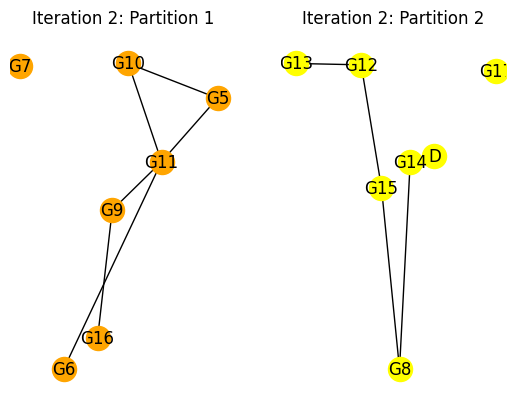

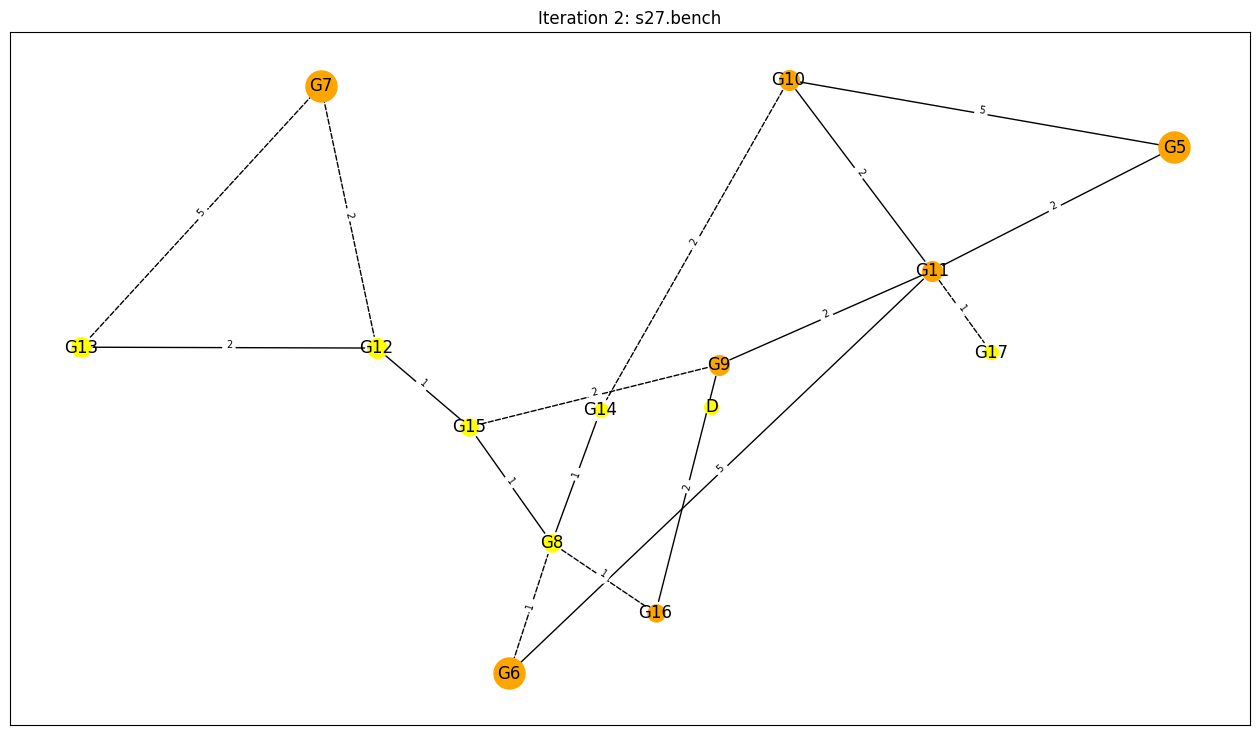

Iteration 3
Curently partitions are:
Par1: ['G10', 'G9', 'G16', 'G11', 'G7', 'G5', 'G6']
Par2: ['G15', 'G17', 'G14', 'D', 'G12', 'G13', 'G8']
u1: ['G10', 'G9', 'G16', 'G11']
u2: ['G15', 'G17', 'G14', 'D']
I_List {'G10': 2, 'G9': 2, 'G16': 0, 'G11': 4, 'G7': 0, 'G5': 5, 'G6': 5, 'G15': 2, 'G17': 0, 'G14': 0, 'D': 0, 'G12': 0, 'G13': 2, 'G8': 1}
E_List {'G10': 2, 'G9': 2, 'G16': 1, 'G11': 0, 'G7': 5, 'G5': 0, 'G6': 0, 'G15': 0, 'G17': 1, 'G14': 0, 'D': 0, 'G12': 2, 'G13': 0, 'G8': 1}
D_List {'G10': 0, 'G9': 0, 'G16': 1, 'G11': -4, 'G7': 5, 'G5': -5, 'G6': -5, 'G15': -2, 'G17': 1, 'G14': 0, 'D': 0, 'G12': 2, 'G13': -2, 'G8': 0}
G value for (G10, G15) is: -2
G value for (G15, G10) is: -2
G value for (G10, G17) is: 1
G value for (G17, G10) is: 1
G value for (G10, G14) is: -4
G value for (G14, G10) is: 0
G value for (G10, D) is: 0
G value for (D, G10) is: 0
G value for (G9, G15) is: -6
G value for (G15, G9) is: -2
G value for (G9, G17) is: 1
G value for (G17, G9) is: 1
G value for (G9, G14) 

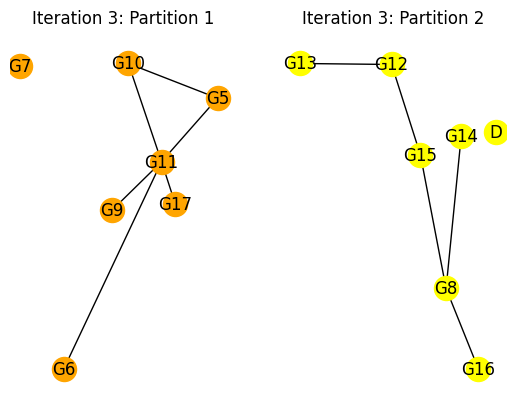

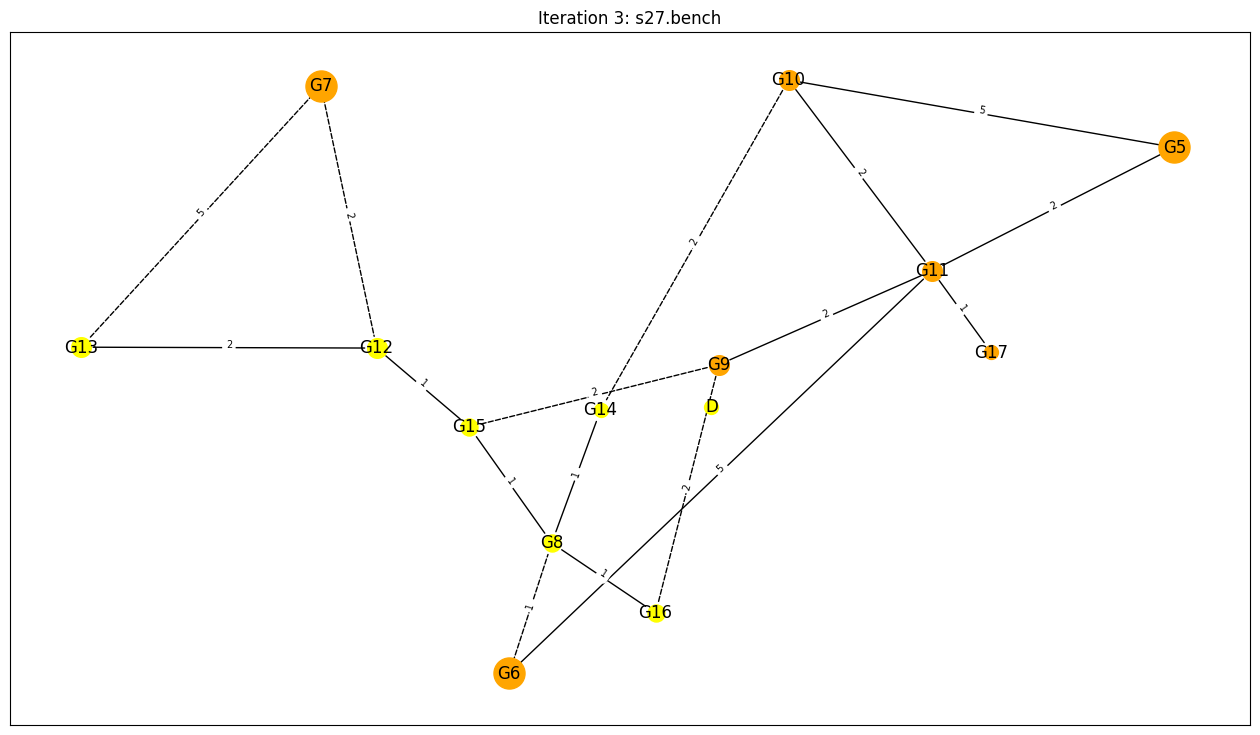

Iteration 4
Curently partitions are:
Par1: ['G10', 'G9', 'G11', 'G7', 'G5', 'G6', 'G17']
Par2: ['G15', 'G14', 'D', 'G12', 'G13', 'G8', 'G16']
u1: ['G10', 'G9', 'G11']
u2: ['G15', 'G14', 'D']
I_List {'G10': 2, 'G9': 0, 'G11': 4, 'G7': 0, 'G5': 5, 'G6': 5, 'G17': 1, 'G15': 2, 'G14': 0, 'D': 0, 'G12': 0, 'G13': 2, 'G8': 1, 'G16': 1}
E_List {'G10': 2, 'G9': 4, 'G11': 0, 'G7': 5, 'G5': 0, 'G6': 0, 'G17': 0, 'G15': 0, 'G14': 0, 'D': 0, 'G12': 2, 'G13': 0, 'G8': 1, 'G16': 0}
D_List {'G10': 0, 'G9': 4, 'G11': -4, 'G7': 5, 'G5': -5, 'G6': -5, 'G17': -1, 'G15': -2, 'G14': 0, 'D': 0, 'G12': 2, 'G13': -2, 'G8': 0, 'G16': -1}
G value for (G10, G15) is: -2
G value for (G15, G10) is: -2
G value for (G10, G14) is: -4
G value for (G14, G10) is: 0
G value for (G10, D) is: 0
G value for (D, G10) is: 0
G value for (G9, G15) is: -2
G value for (G15, G9) is: 2
G value for (G9, G14) is: 4
G value for (G14, G9) is: 4
G value for (G9, D) is: 4
G value for (D, G9) is: 4
G value for (G11, G15) is: -6
G value for

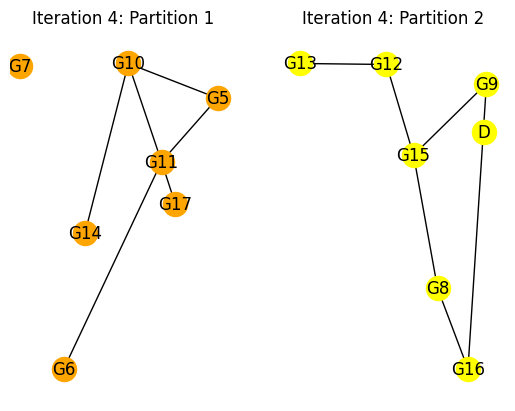

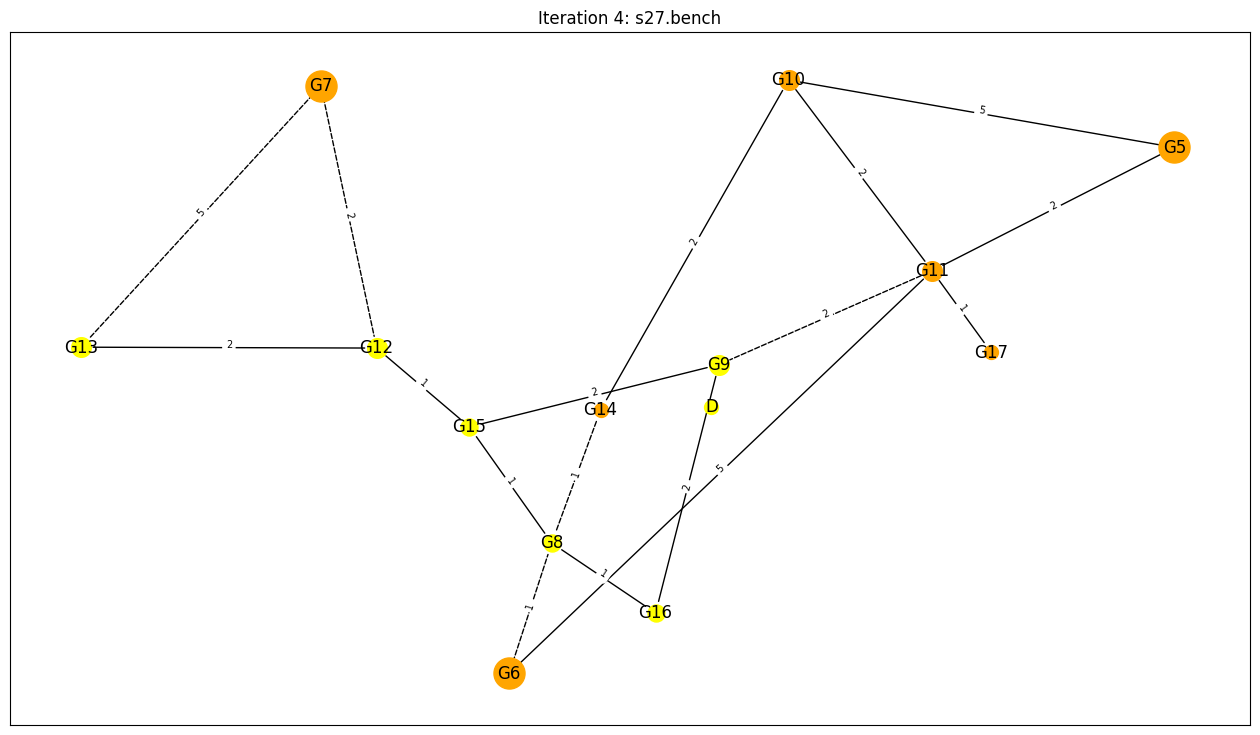

Iteration 5
Curently partitions are:
Par1: ['G10', 'G11', 'G7', 'G5', 'G6', 'G17', 'G14']
Par2: ['G15', 'D', 'G12', 'G13', 'G8', 'G16', 'G9']
u1: ['G10', 'G11']
u2: ['G15', 'D']
I_List {'G10': 4, 'G11': 2, 'G7': 0, 'G5': 5, 'G6': 5, 'G17': 1, 'G14': 0, 'G15': 2, 'D': 0, 'G12': 0, 'G13': 2, 'G8': 0, 'G16': 1, 'G9': 4}
E_List {'G10': 0, 'G11': 2, 'G7': 5, 'G5': 0, 'G6': 0, 'G17': 0, 'G14': 0, 'G15': 0, 'D': 0, 'G12': 2, 'G13': 0, 'G8': 2, 'G16': 0, 'G9': 0}
D_List {'G10': -4, 'G11': 0, 'G7': 5, 'G5': -5, 'G6': -5, 'G17': -1, 'G14': 0, 'G15': -2, 'D': 0, 'G12': 2, 'G13': -2, 'G8': 2, 'G16': -1, 'G9': -4}
G value for (G10, G15) is: -6
G value for (G15, G10) is: -6
G value for (G10, D) is: -4
G value for (D, G10) is: -4
G value for (G11, G15) is: -2
G value for (G15, G11) is: -2
G value for (G11, D) is: 0
G value for (D, G11) is: 0
Max g value= 0
Sum of G_max: 27
Pair to be swapped ('G11', 'D')
Cost= 0
Final Pair as follows
from par1: G11
from par2: D
No of cuts in iter 5 = 8


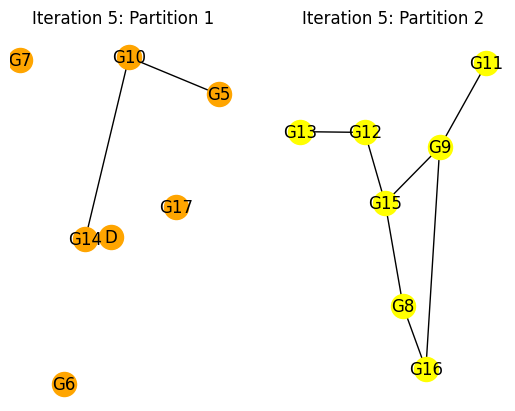

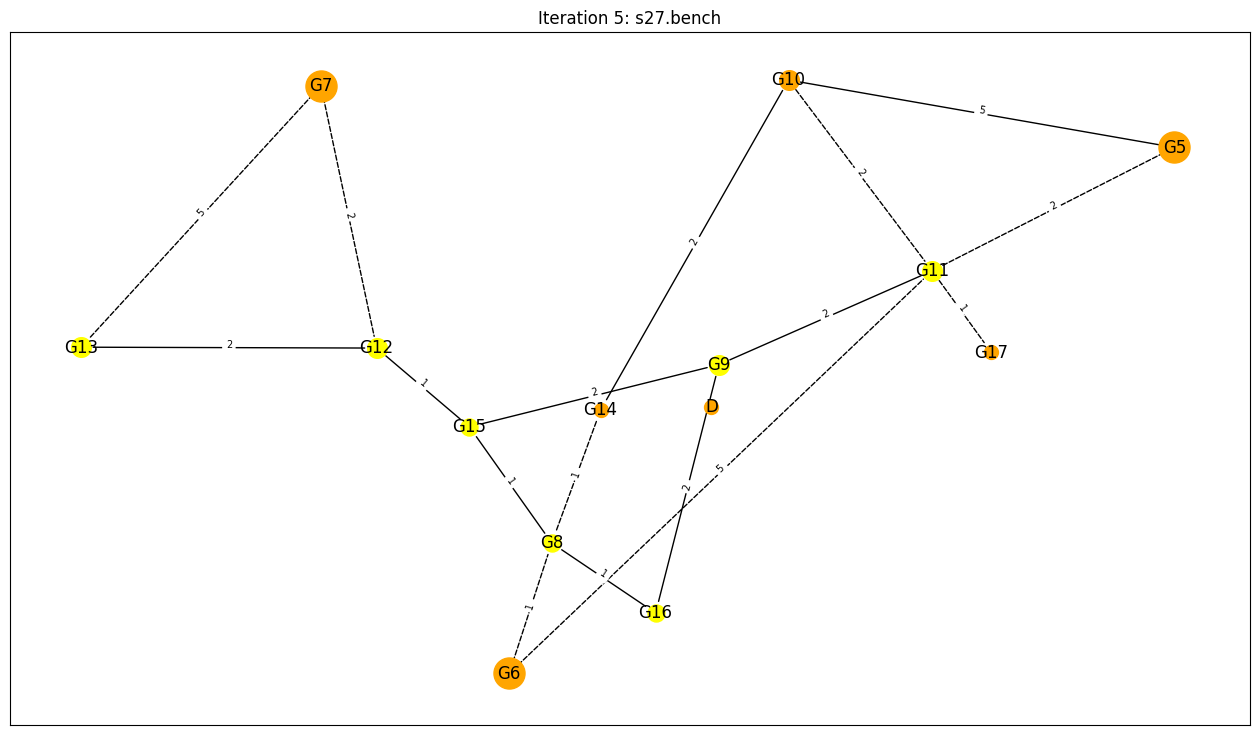

Iteration 6
Curently partitions are:
Par1: ['G10', 'G7', 'G5', 'G6', 'G17', 'G14', 'D']
Par2: ['G15', 'G12', 'G13', 'G8', 'G16', 'G9', 'G11']
u1: ['G10']
u2: ['G15']
I_List {'G10': 2, 'G7': 0, 'G5': 5, 'G6': 0, 'G17': 0, 'G14': 0, 'D': 0, 'G15': 2, 'G12': 0, 'G13': 2, 'G8': 0, 'G16': 1, 'G9': 4, 'G11': 2}
E_List {'G10': 2, 'G7': 5, 'G5': 0, 'G6': 5, 'G17': 1, 'G14': 0, 'D': 0, 'G15': 0, 'G12': 2, 'G13': 0, 'G8': 2, 'G16': 0, 'G9': 0, 'G11': 2}
D_List {'G10': 0, 'G7': 5, 'G5': -5, 'G6': 5, 'G17': 1, 'G14': 0, 'D': 0, 'G15': -2, 'G12': 2, 'G13': -2, 'G8': 2, 'G16': -1, 'G9': -4, 'G11': 0}
G value for (G10, G15) is: -2
G value for (G15, G10) is: -2
Max g value= -2
Sum of G_max: 25
Pair to be swapped ('G10', 'G15')
Cost= 0
Final Pair as follows
from par1: G10
from par2: G15
No of cuts in iter 6 = 12


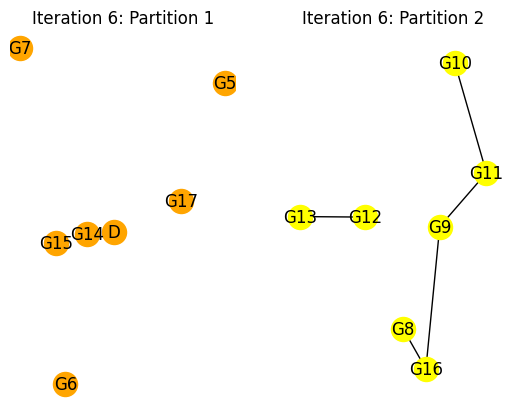

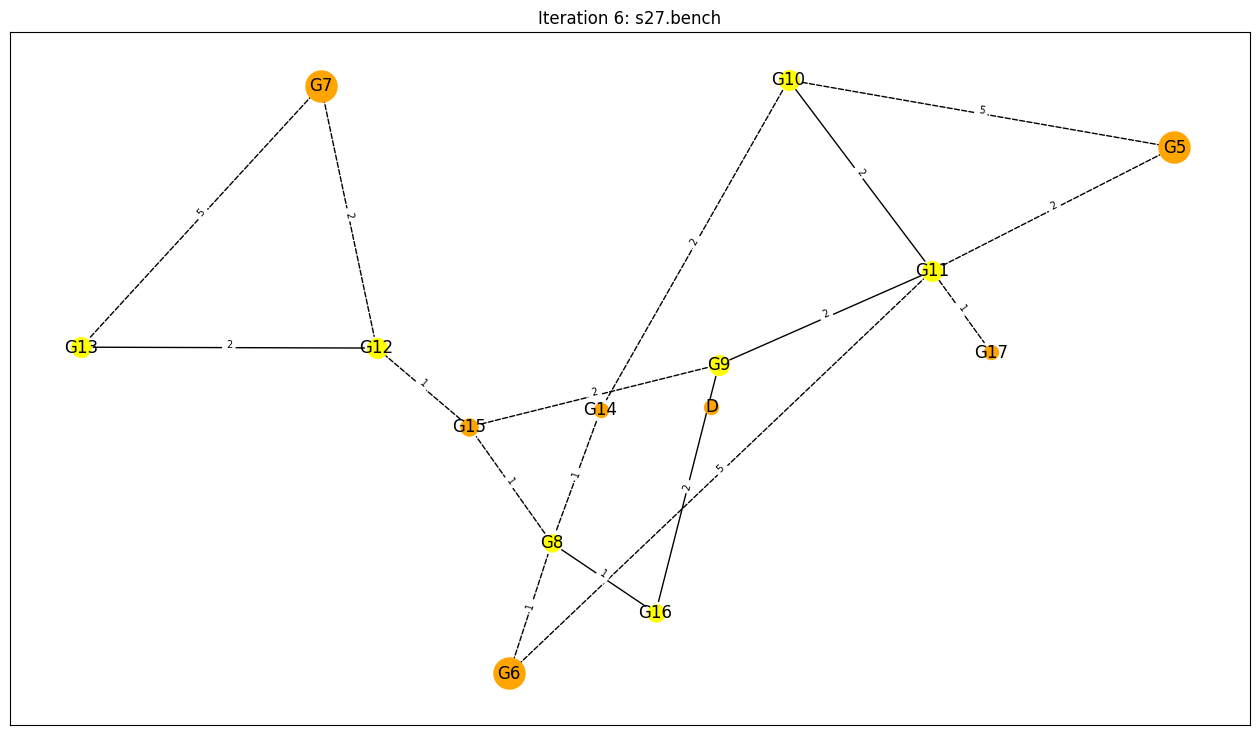

Final Result:
Partition 1 : ['G10', 'G11', 'G7', 'G5', 'G6', 'G17', 'G14']
Partition 2 : ['G15', 'D', 'G12', 'G13', 'G8', 'G16', 'G9']
KL Iteration : 4
Max G_Sum value : 27


In [9]:
import random
def Kernighan_Lin(G, init_part=None):                                                   #KL Algorithm for partitioning
  print('Edges with weights:',edges_with_weights)
  BV=len(nodes)//2
  if init_part==None:
    options=nodes.copy()
    random.shuffle(options)                                               #random.shuffle ensures random initial bipartition of nodes
    par1=options[:BV]
    par2=options[BV:]
    u1=options[:BV]
    u2=options[BV:]
  else:
    par1=init_part[0]
    par2=init_part[1]
    u1=par1[:]
    u2=par2[:]
  print('Par1:',par1)
  print('Par2:',par2)
  def Cost(i,j,edges_with_weights):                                     #COst function to give edge weight cost
      for a,b,c in edges_with_weights:
        if a==i and b==j:
          return c
      else:
         return 0
  G_Sum=0                                                               #G_Sum will hold sumation of max G values in each iteration
  G_Ceil=float('-inf')                                                  #G_Ceil will hold the max G_Sum value in all iteration
  Distribution=[]                                                       #Distribution array will hold the best partition and G_Ceil
  no_of_cuts=0
  for iter in range(BV):
    I_List={}
    E_List={}
    D_List={}
    print("Iteration",iter)
    print("Curently partitions are:")
    print('Par1:',par1)
    print('Par2:',par2)
    print('u1:',u1)
    print('u2:',u2)
    if iter>=0:                                                         #supposed to be iter=0 but the else is not ready yet
      for i in par1:                                                    #both for loops fill the I,E and D Lists
        I=0
        E=0
        for s,e,w in edges_with_weights:
          if s==i:
            if e in par1:
              I+=w
            elif e in par2:
              E+=w
        D=E-I
        I_List[i]=I
        E_List[i]=E
        D_List[i]=D
      for i in par2:
        I=0
        E=0
        for s,e,w in edges_with_weights:
          if s==i:
            if e in par2:
              I+=w
            elif e in par1:
              E+=w
        D=E-I
        I_List[i]=I
        E_List[i]=E
        D_List[i]=D
      print('I_List',I_List)
      print('E_List',E_List)
      print('D_List',D_List)
    else:                                                               #This else for later code revision to make optmised changes of D values
      pass
    G_List={}
    for i in u1:
      for j in u2:
         Gval=D_List[i]+D_List[j]-(2*Cost(i,j,edges_with_weights))      #G=Di+Dj=2Cij
         G_List[(i,j)]=Gval
         Gval=D_List[j]+D_List[i]-(2*Cost(j,i,edges_with_weights))
         G_List[(j,i)]=Gval
    for (i, j), Gval in G_List.items():
      print(f"G value for ({i}, {j}) is: {Gval}")
    M=max(G_List.values())                                              #M will stroee the max G value
    print('Max g value=',M)
    G_Sum+=M
    print('Sum of G_max:',G_Sum)
    Check1=float('inf')                                                           #Check1 and Check2 are variables helping with tie-breaker scenarios in the algorithm wih respect to gain
    Check2=-1
    SWAP=list(G_List.keys())[0]
    for a,b in G_List.items():
      if b==M:
        if Cost(a[0],a[1],edges_with_weights)<Check1:
          Check1=Cost(a[0],a[1],edges_with_weights)
          print('Pair to be swapped',a)
          print('Cost=',Cost(a[0],a[1],edges_with_weights))
          SWAP=a
        #if Cost(a[0],a[1],edges_with_weights)==Check1 and abs(E_List[a[0]]-E_List[a[1]])>Check2: # Updates pair to be swapped if it has better cross connects and better or equal edge cost
        #  Check2=abs(E_List[a[0]]-E_List[a[1]])
        #  print('Pair to be swapped through cond 2',a)
        #  print('Cost=',Cost(a[0],a[1],edges_with_weights))
        #  SWAP=a
    print('Final Pair as follows')
    print('from par1:',SWAP[0])
    print('from par2:',SWAP[1])
    dashed_edges=[]
    if SWAP[0] in u1:
      u1.remove(SWAP[0])
      u2.remove(SWAP[1])
      par1.remove(SWAP[0])
      par2.remove(SWAP[1])
      par1.append(SWAP[1])
      par2.append(SWAP[0])
    elif SWAP[0] in u2:
      u1.remove(SWAP[1])
      u2.remove(SWAP[0])
      par1.remove(SWAP[1])
      par2.remove(SWAP[0])
      par1.append(SWAP[0])
      par2.append(SWAP[1])
    if G_Sum>G_Ceil:
      G_Ceil=G_Sum
      a=par1[:]
      b=par2[:]
      Distribution=[a,b,iter,G_Ceil]
    PARG1=G.subgraph(par1)
    PARG2=G.subgraph(par2)
    for i,j in G.edges():
      if (i in par1 and j in par2) or (i in par2 and j in par1):
        dashed_edges.append((i,j))
    no_of_cuts=len(dashed_edges)
    print('No of cuts in iter',iter,'=',no_of_cuts)
    fig, (ax1, ax2) = plt.subplots(1, 2)                                 #Create a figure with 1 row and 2 columns
    nx.draw(PARG1, pos, with_labels=True, node_color='orange', ax=ax1)   #Draw partition 1 on ax1
    ax1.set_title('Iteration ' + str(iter) + ': Partition 1')
    nx.draw(PARG2, pos, with_labels=True, node_color='yellow', ax=ax2)   #Draw partition 2 on ax2
    ax2.set_title('Iteration ' + str(iter) + ': Partition 2')
    plt.show()
    plt.figure(figsize =(16, 9))
    for node in G.nodes:
      if node in par1:                                                   #Partition 1 is coded orange
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=sizes[node], node_color='orange')
      if node in par2:                                                   #Partition 2 is coded orange
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=sizes[node], node_color='yellow')
      nx.draw_networkx_labels(G, pos, labels={node:node})
    for edge in G.edges:
      if edge in dashed_edges:                                           #Dashed edges
        nx.draw_networkx_edges(G, pos, edgelist=[edge], style='--', arrows=True)
      else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, verticalalignment='baseline', font_size=7)
    plt.title('Iteration ' + str(iter) + ': '+filename)
    plt.show()
  print('Final Result:')
  print('Partition 1 :',Distribution[0])
  print('Partition 2 :',Distribution[1])
  print('KL Iteration :',Distribution[2])
  print('Max G_Sum value :',Distribution[3])
  return Distribution

undirected_G = G.to_undirected()
Res1=Kernighan_Lin(undirected_G)

new_part=(Res1[0],Res1[1])

Floorplanning

1. Deciding the block sizes of each gate
2. Create a grid
3. find directions of each block w.r.t each other
4. Plot them without intersection

In [10]:
def DFS(mat, start, nodes, polish):
    n = mat.shape[0]
    visited = np.zeros(n, dtype=bool)
    output = []
    fl=0
    print('before helper loop')
    def helper(node,fl):
        fl+=1
        print('helper loop', fl)
        print('node', nodes[node])

        visited[node] = True
        output.append(node)
        for neighbor in range(n):
          print('neighbor', nodes[neighbor])
          if mat[node][neighbor] >= 1 and visited[neighbor]==False:
            edge_type = "V" if neighbor < node else "H"
            helper(neighbor, fl)
            polish.append(edge_type)
            polish.append(nodes[node])

    helper(fp,fl)
    return output
print(nodes)
polish_expression = []
vn = DFS(adjacency_matrix, fp, nodes, polish_expression)
vnn=[]
for i in vn:
  vnn.append(nodes[i])
print(vnn)  # Output: [0, 1, 3, 4, 2]
print(polish_expression)

['G5', 'G10', 'G6', 'G11', 'G7', 'G13', 'G14', 'G17', 'G8', 'G15', 'G12', 'G16', 'G9', 'D']
before helper loop
helper loop 1
node G17
neighbor G5
neighbor G10
neighbor G6
neighbor G11
helper loop 2
node G11
neighbor G5
helper loop 3
node G5
neighbor G5
neighbor G10
helper loop 4
node G10
neighbor G5
neighbor G10
neighbor G6
neighbor G11
neighbor G7
neighbor G13
neighbor G14
helper loop 5
node G14
neighbor G5
neighbor G10
neighbor G6
neighbor G11
neighbor G7
neighbor G13
neighbor G14
neighbor G17
neighbor G8
neighbor G15
neighbor G12
neighbor G16
neighbor G9
neighbor D
neighbor G17
neighbor G8
neighbor G15
neighbor G12
neighbor G16
neighbor G9
neighbor D
neighbor G6
neighbor G11
neighbor G7
neighbor G13
neighbor G14
neighbor G17
neighbor G8
neighbor G15
neighbor G12
neighbor G16
neighbor G9
neighbor D
neighbor G10
neighbor G6
neighbor G11
neighbor G7
neighbor G13
neighbor G14
neighbor G17
neighbor G8
neighbor G15
neighbor G12
neighbor G16
neighbor G9
helper loop 3
node G9
neighbor G5
ne

In [11]:
class Block:
    def __init__(self, id, width, height):
        self.id = id
        self.width = width
        self.height = height
        self.x = 0
        self.y = 0